### DATA WRANGLING & EDA PART

LOADING LIBRARIES AND DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### DATA INQUIRY

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
#Let`s copy our data and keep data`s itself as data for further process

In [5]:
data['income_class'] = data['income'].map({'>50K':1,'<=50K':0})

In [6]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_class
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0


In [7]:
#Let`s find out which columns have "?"

In [8]:
def unknown(x):
    return sum(x=='?')
data.apply(unknown)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
income_class         0
dtype: int64

In [9]:
# Unknown row number for workclass is approximately %5<%20 so we can ignore at this moment.
# Same reason works for occupation and native.country columns as well. 
#We are going to check these columns during ML time.

### Distribution of demographic

In [10]:
data['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

### Seperating into 2 dataset
### 1)

In [11]:
# There is a list of top 5 workclass of group of people with '50K above'.

higher = data[data['income_class']==1]
higher_wrk = higher['workclass'].value_counts()
first5_wrk = higher_wrk.head(5)
first5_wrk

Private             4963
Self-emp-not-inc     724
Self-emp-inc         622
Local-gov            617
Federal-gov          371
Name: workclass, dtype: int64

### EDA

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdc0bc3320>],
      dtype=object)

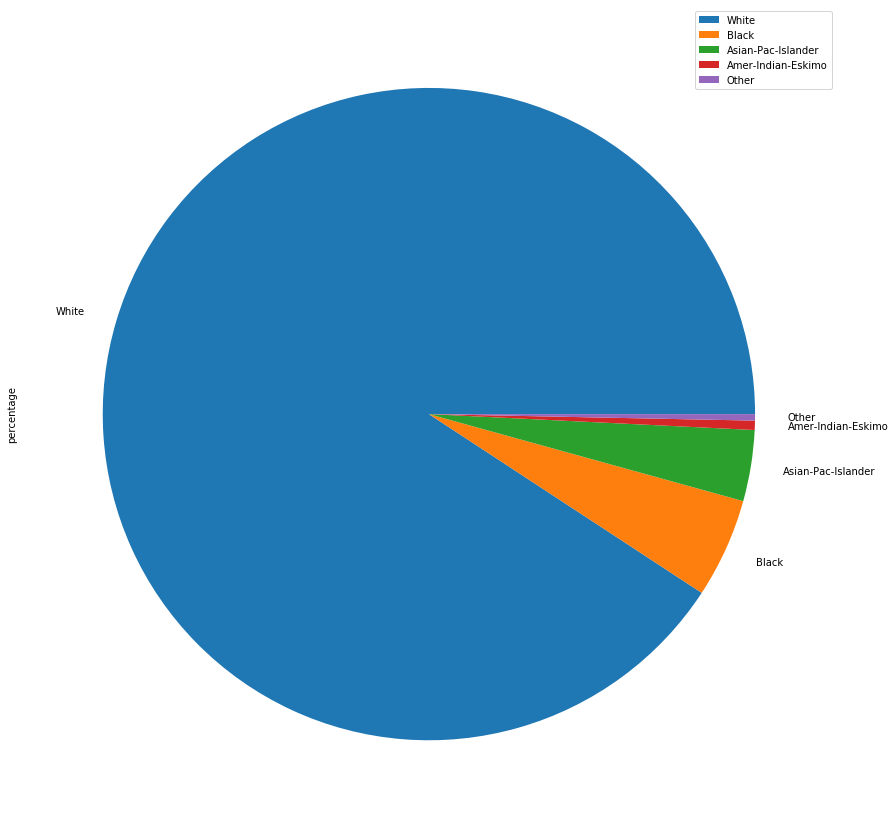

In [12]:
racer = pd.DataFrame({'percentage':[len(higher[higher['race']=='White'])/len(higher['race']),
    len(higher[higher['race']=='Black'])/len(higher['race']),
     len(higher[higher['race']=='Asian-Pac-Islander'])/len(higher['race']),
     len(higher[higher['race']=='Amer-Indian-Eskimo'])/len(higher['race']),
     len(higher[higher['race']=='Other'])/len(higher['race'])]},
        index = ['White','Black','Asian-Pac-Islander','Amer-Indian-Eskimo','Other'])
racer.plot.pie(y='percentage',figsize=(15,15),subplots=True)

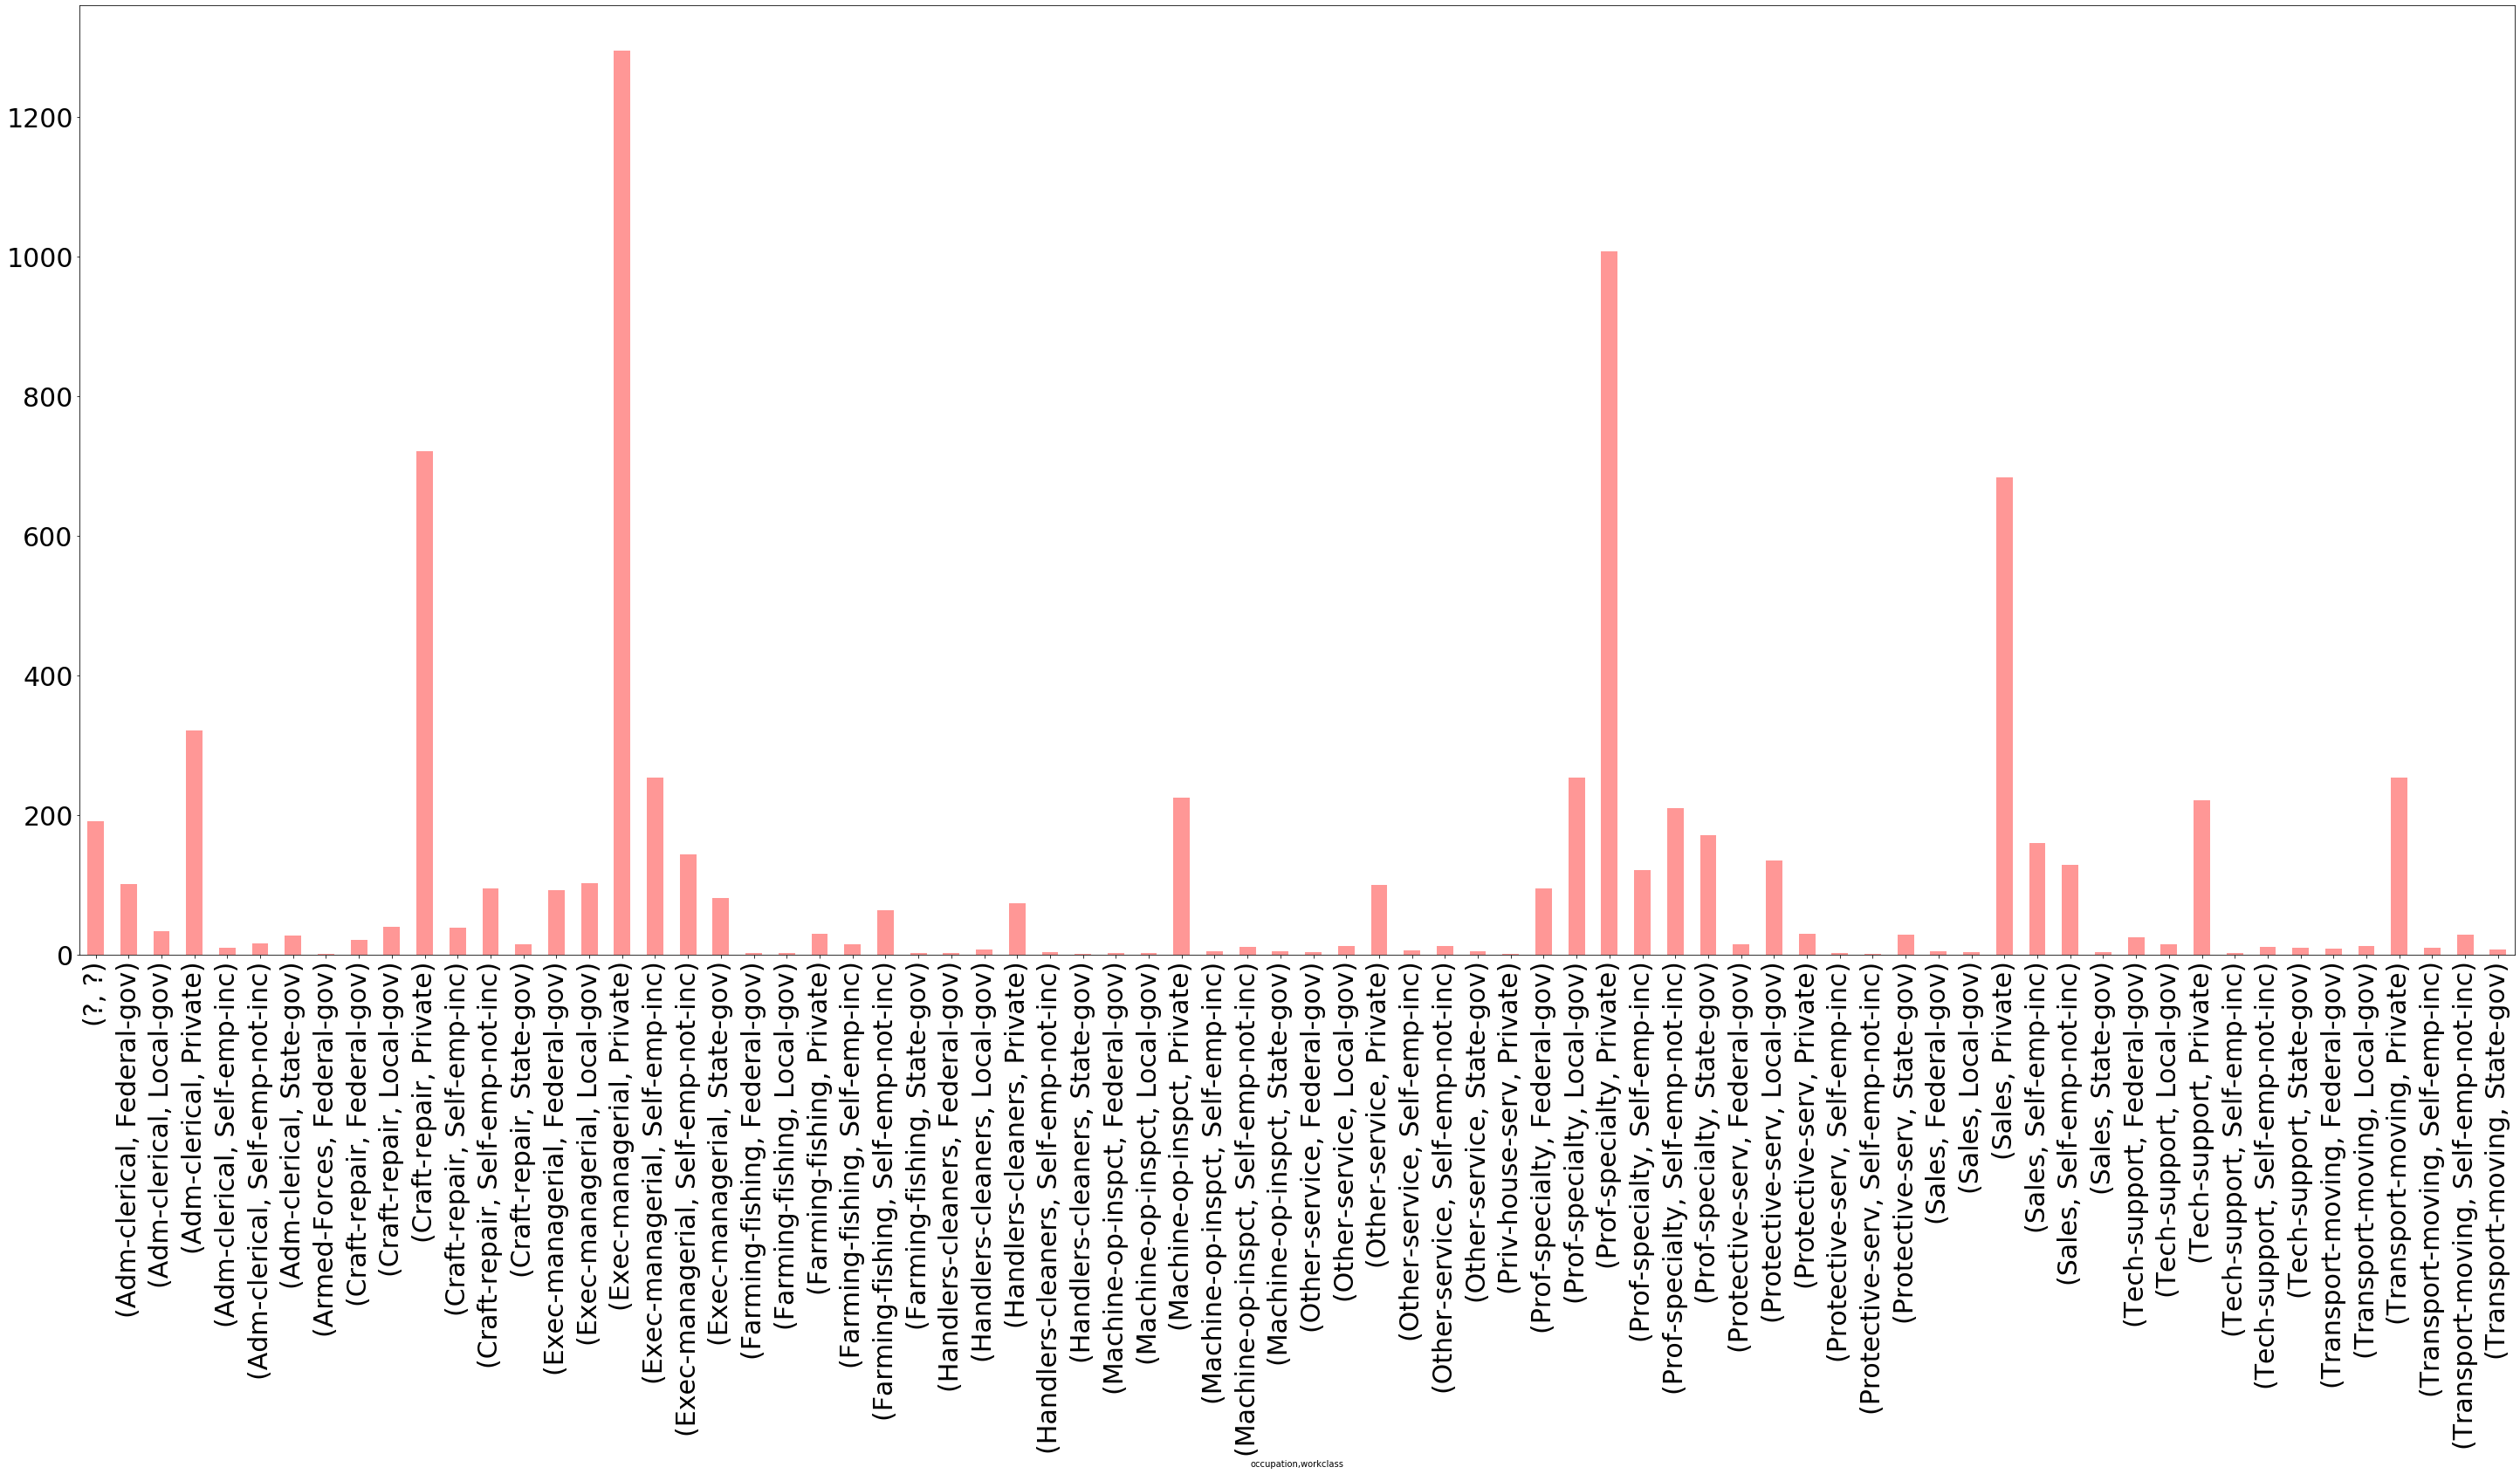

In [13]:
# Classified group of people who have above 50K income with respect to certain occupation and certain workclass.

higher = data[data['income_class']==1]
higher_occup = higher.groupby(['occupation','workclass']).size().plot(kind='bar',figsize=(50,20),fontsize=30,color='#ff9796')

In [14]:
higher = data[data['income_class']==1]
higher_occup = higher['occupation'].value_counts()
first5_occup = higher_occup.head(5)
first5_occup 

Exec-managerial    1968
Prof-specialty     1859
Sales               983
Craft-repair        929
Adm-clerical        507
Name: occupation, dtype: int64

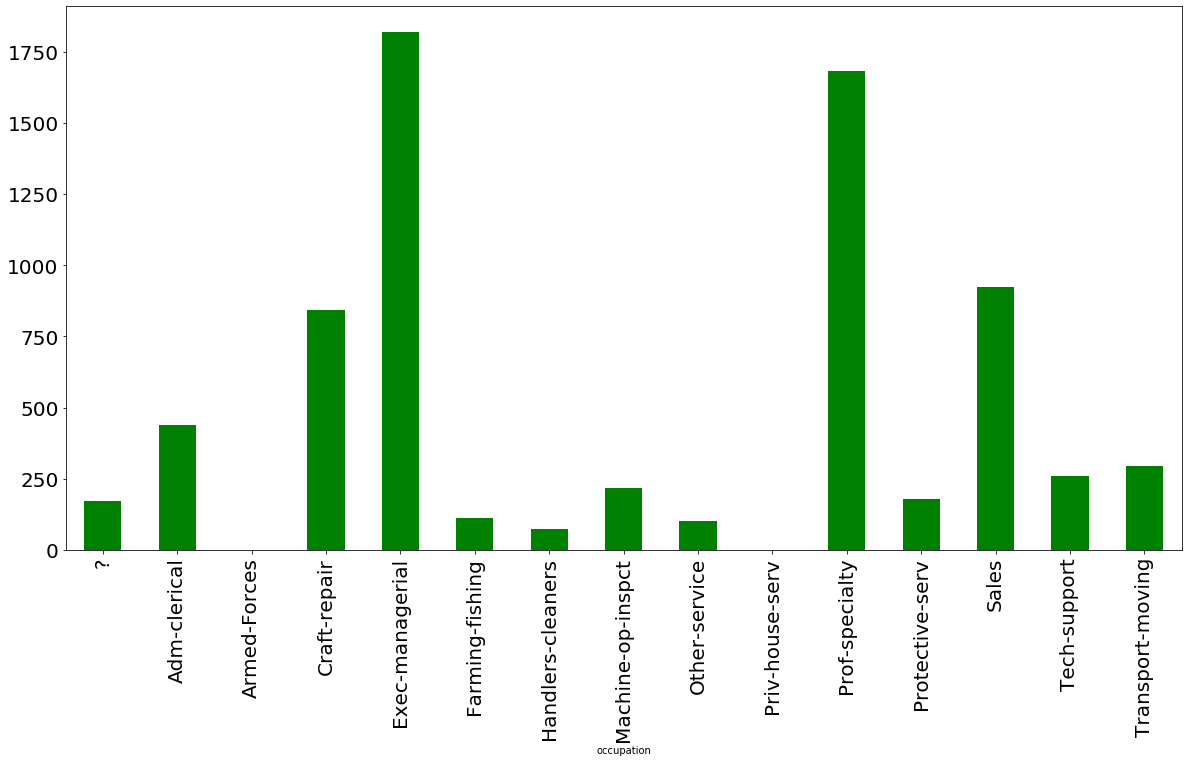

In [15]:
#certain race group(white) above 50K income with respect to certain occupation
d = higher
d = d[d.race == 'White']
d.groupby(['occupation']).size().plot(kind='bar',color='green',figsize=(20,10),fontsize=20)

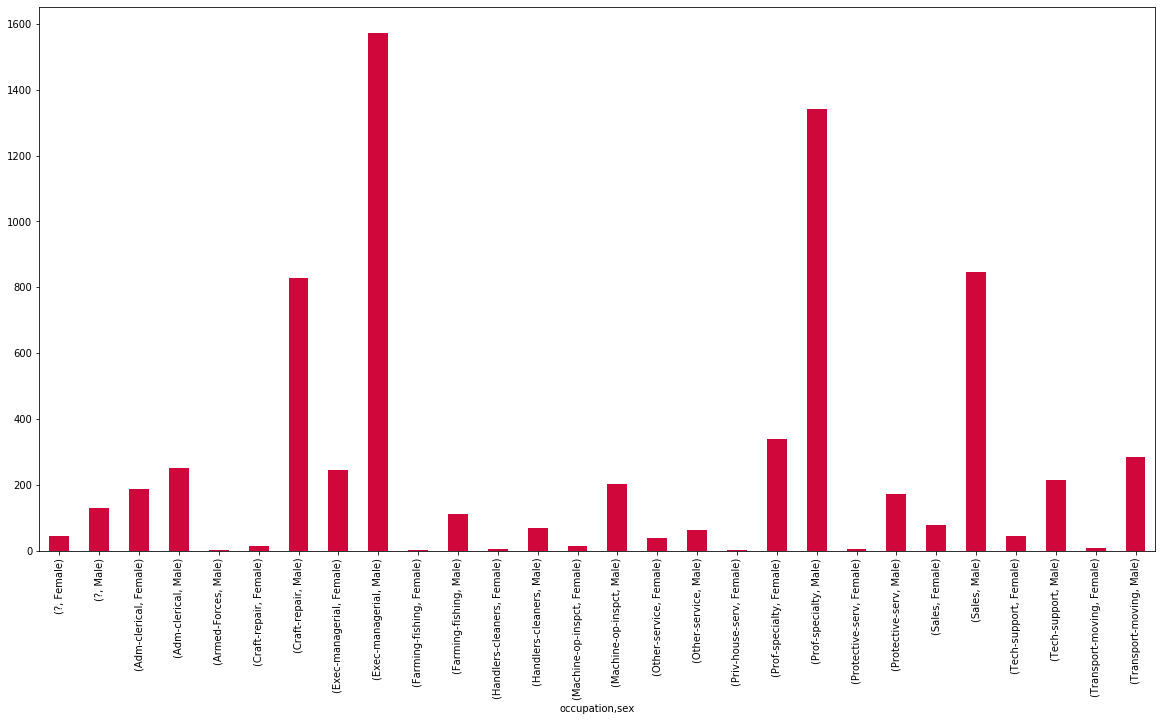

In [16]:
e = higher
e = e[e.race == 'White']
e = e.groupby(['occupation','sex']).size().plot(kind ='bar',figsize=(20,10),color='#cf073a')

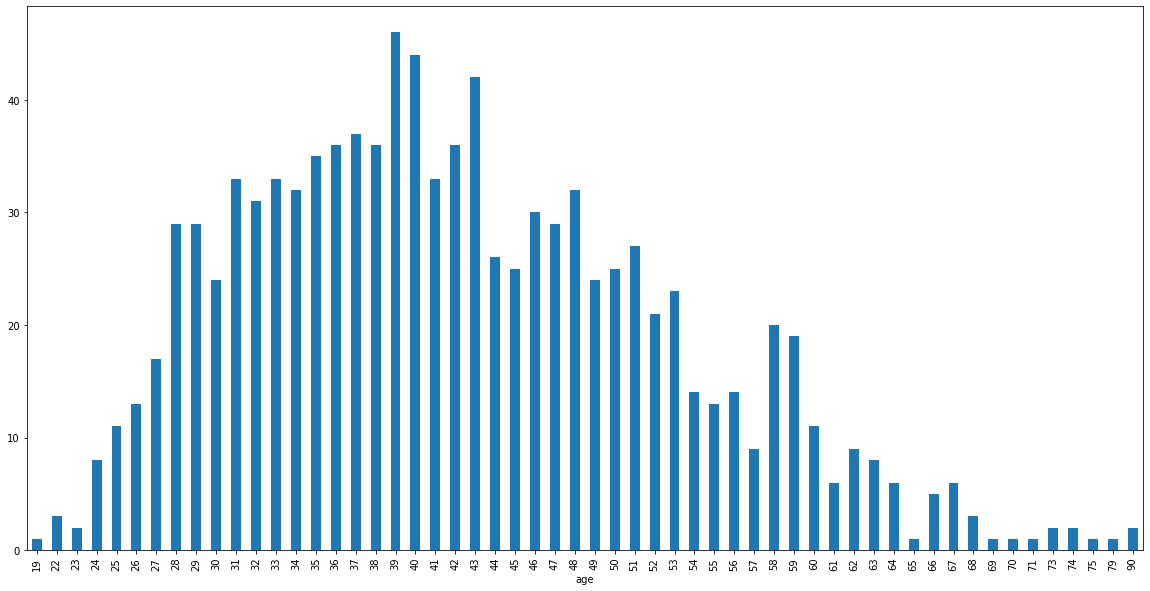

In [17]:
#Detailed age distribution of white woman with above 50K
h = higher
h = h[(h['sex']=='Female')&(h['race']=='White')]
h.groupby(['age']).size().plot(kind='bar',figsize=(20,10))

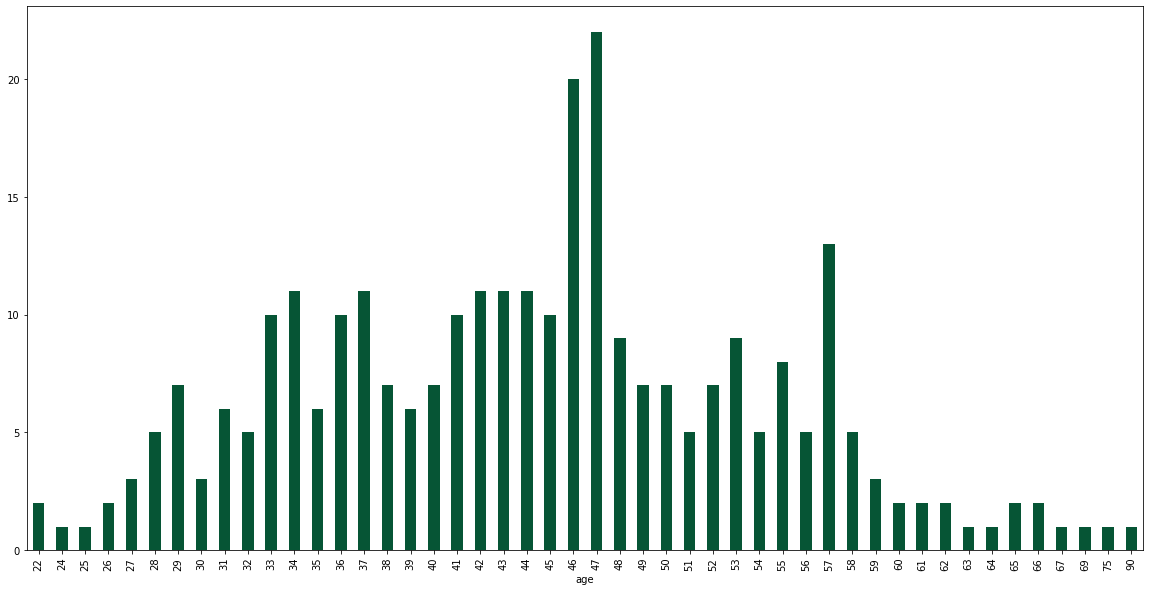

In [18]:
h = higher
h = h[(h['sex']=='Male')&(h['race']=='Black')]
h.groupby(['age']).size().plot(kind='bar',figsize=(20,10),color='#065535')

### 2)

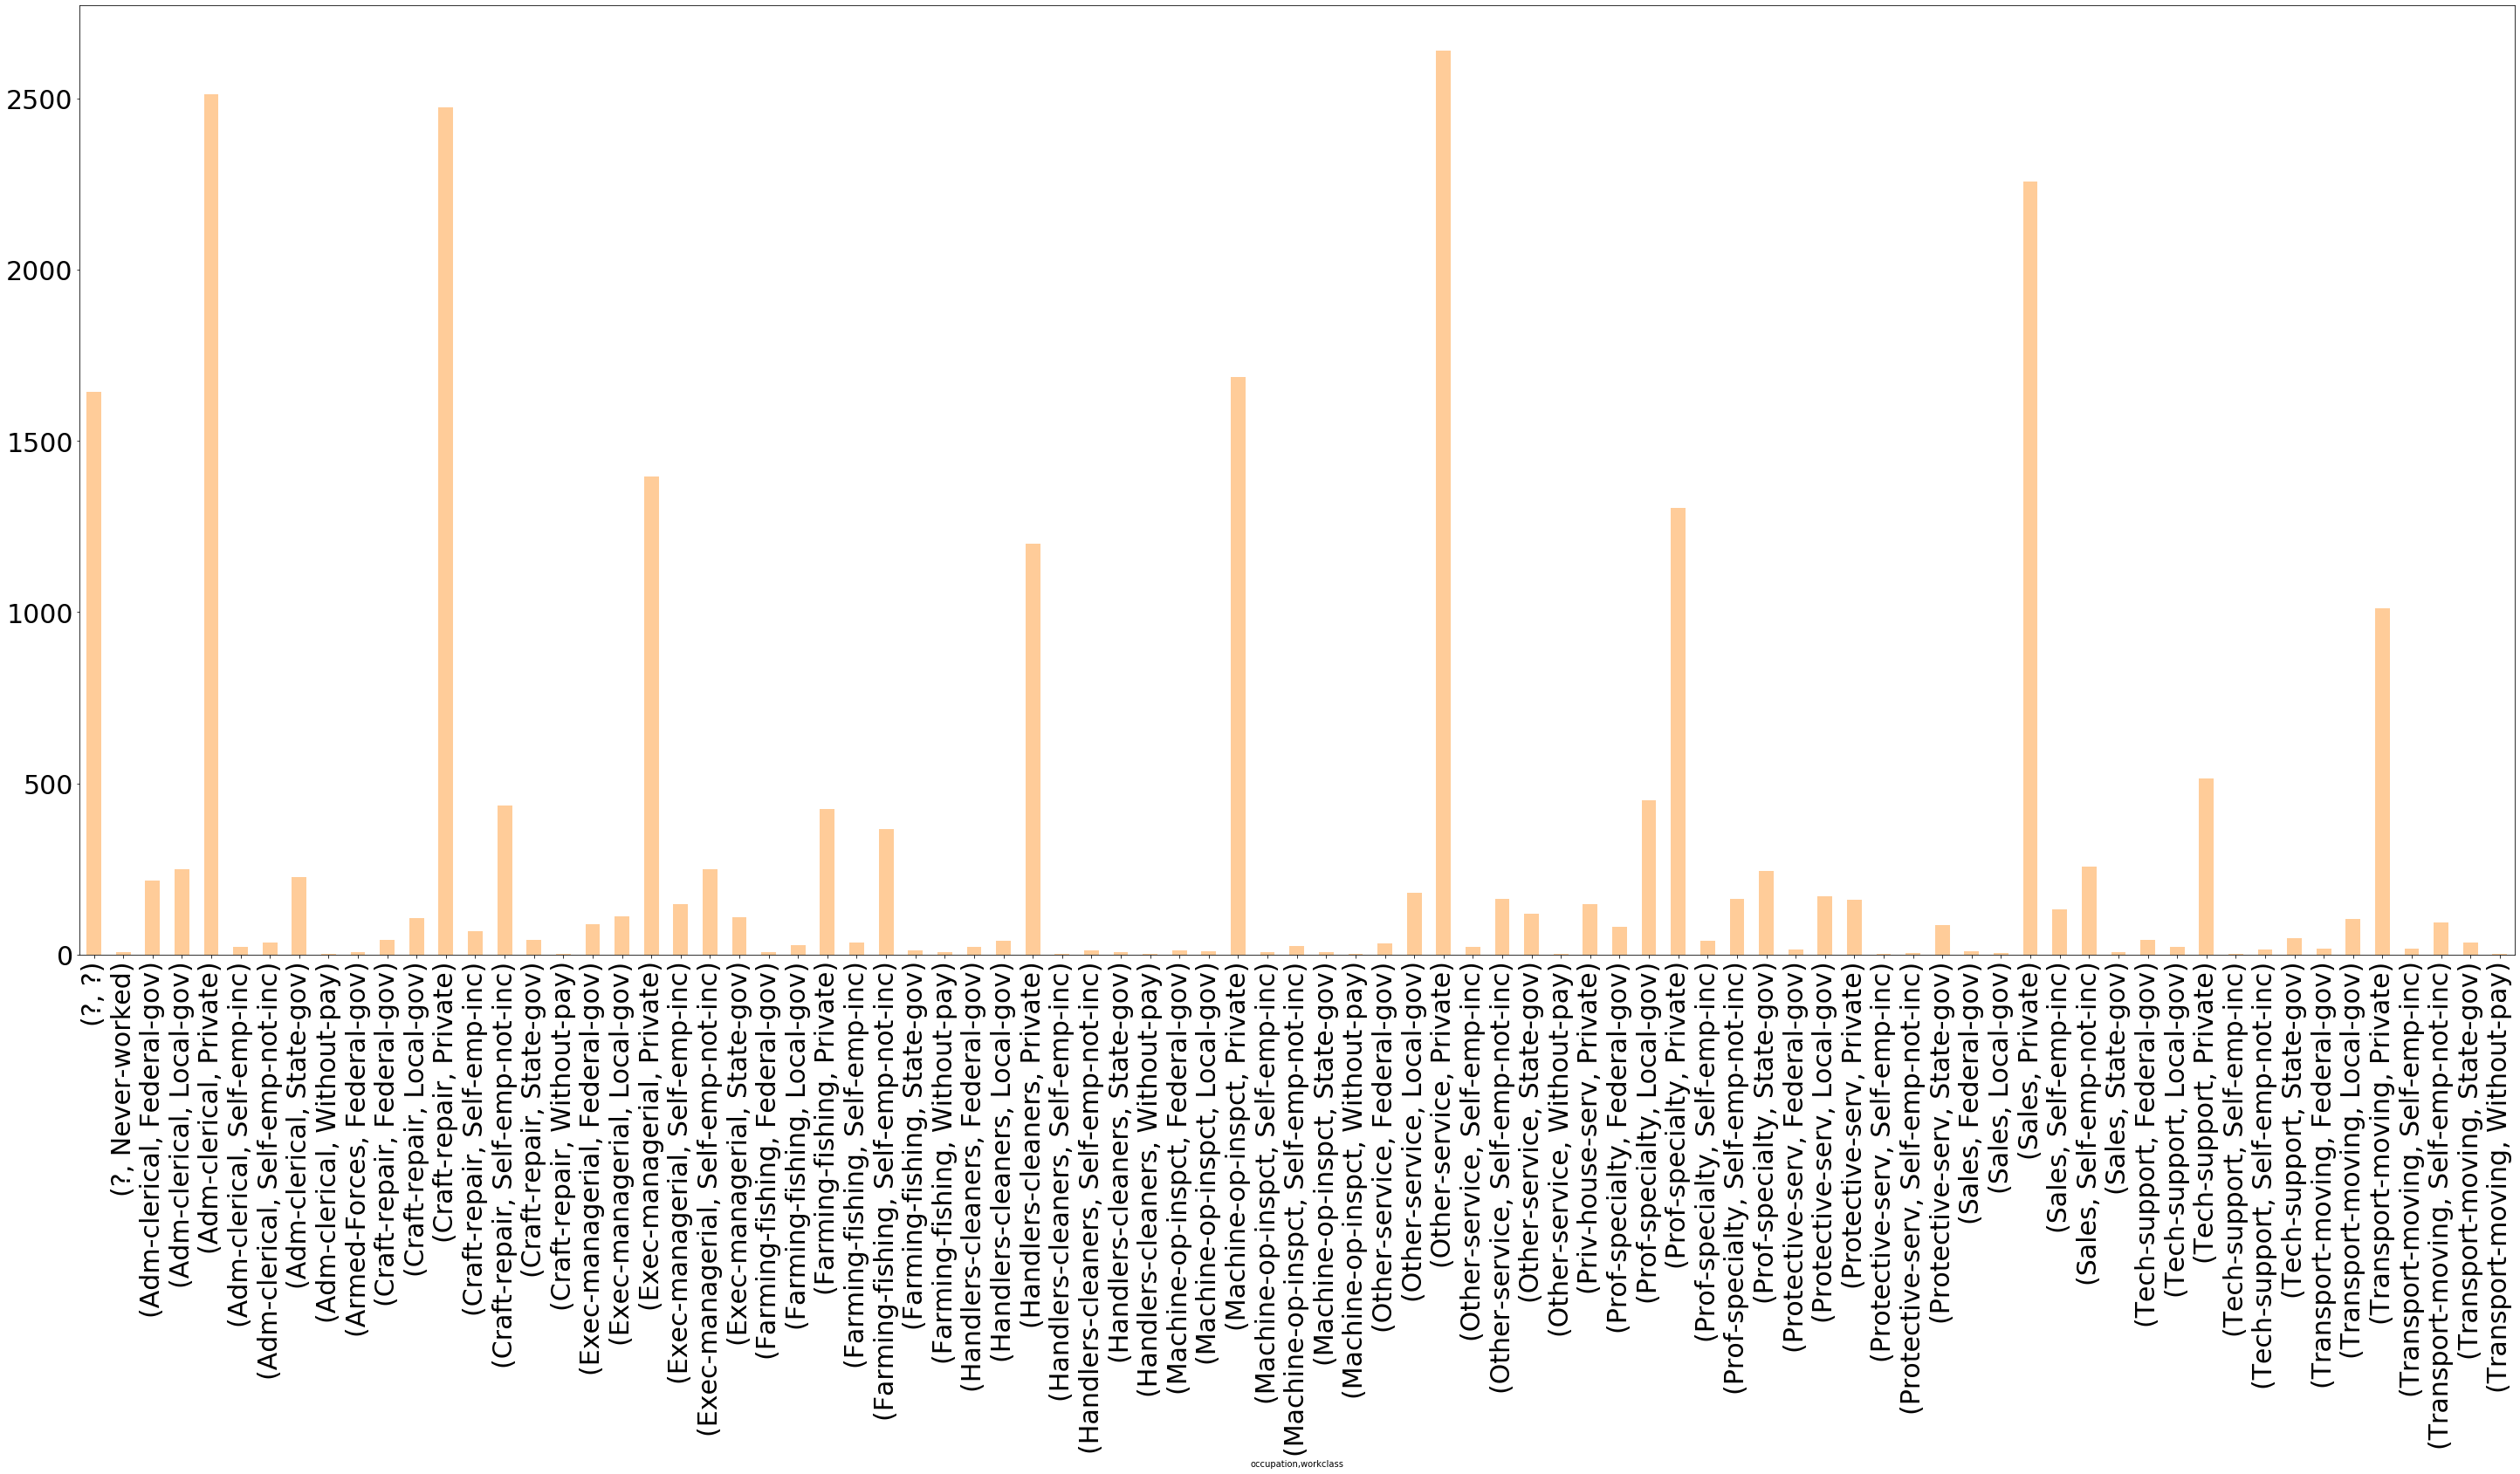

In [19]:
lower = data[data['income_class']==0]
lower_occup = lower.groupby(['occupation','workclass']).size().plot(kind='bar',figsize=(50,20),fontsize=30,color='#ffcc99')

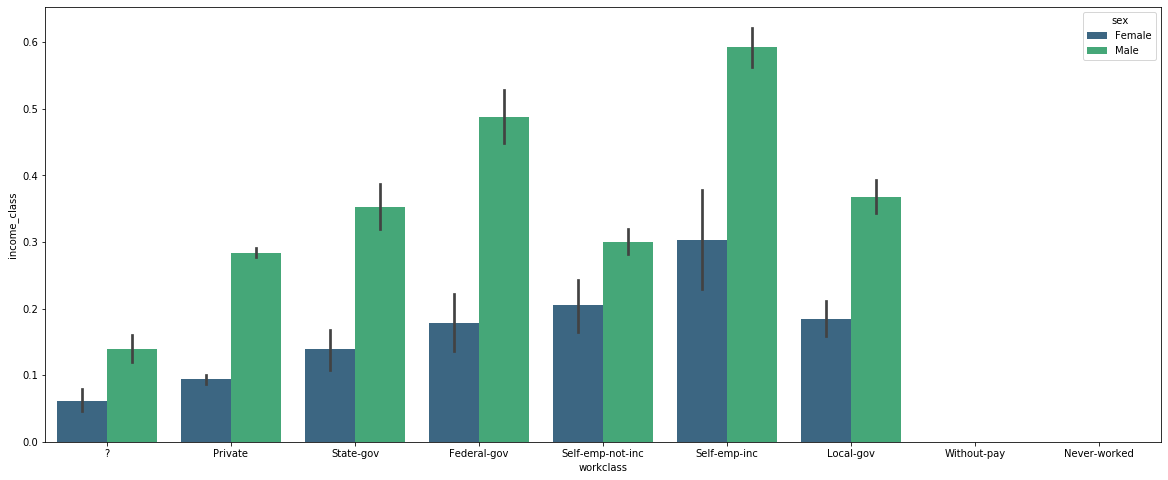

In [20]:
fig,axes = plt.subplots(figsize=(20,8))
fig = sns.barplot(x='workclass',y='income_class',data=data,hue='sex',palette='viridis')
sns.set_context('poster')

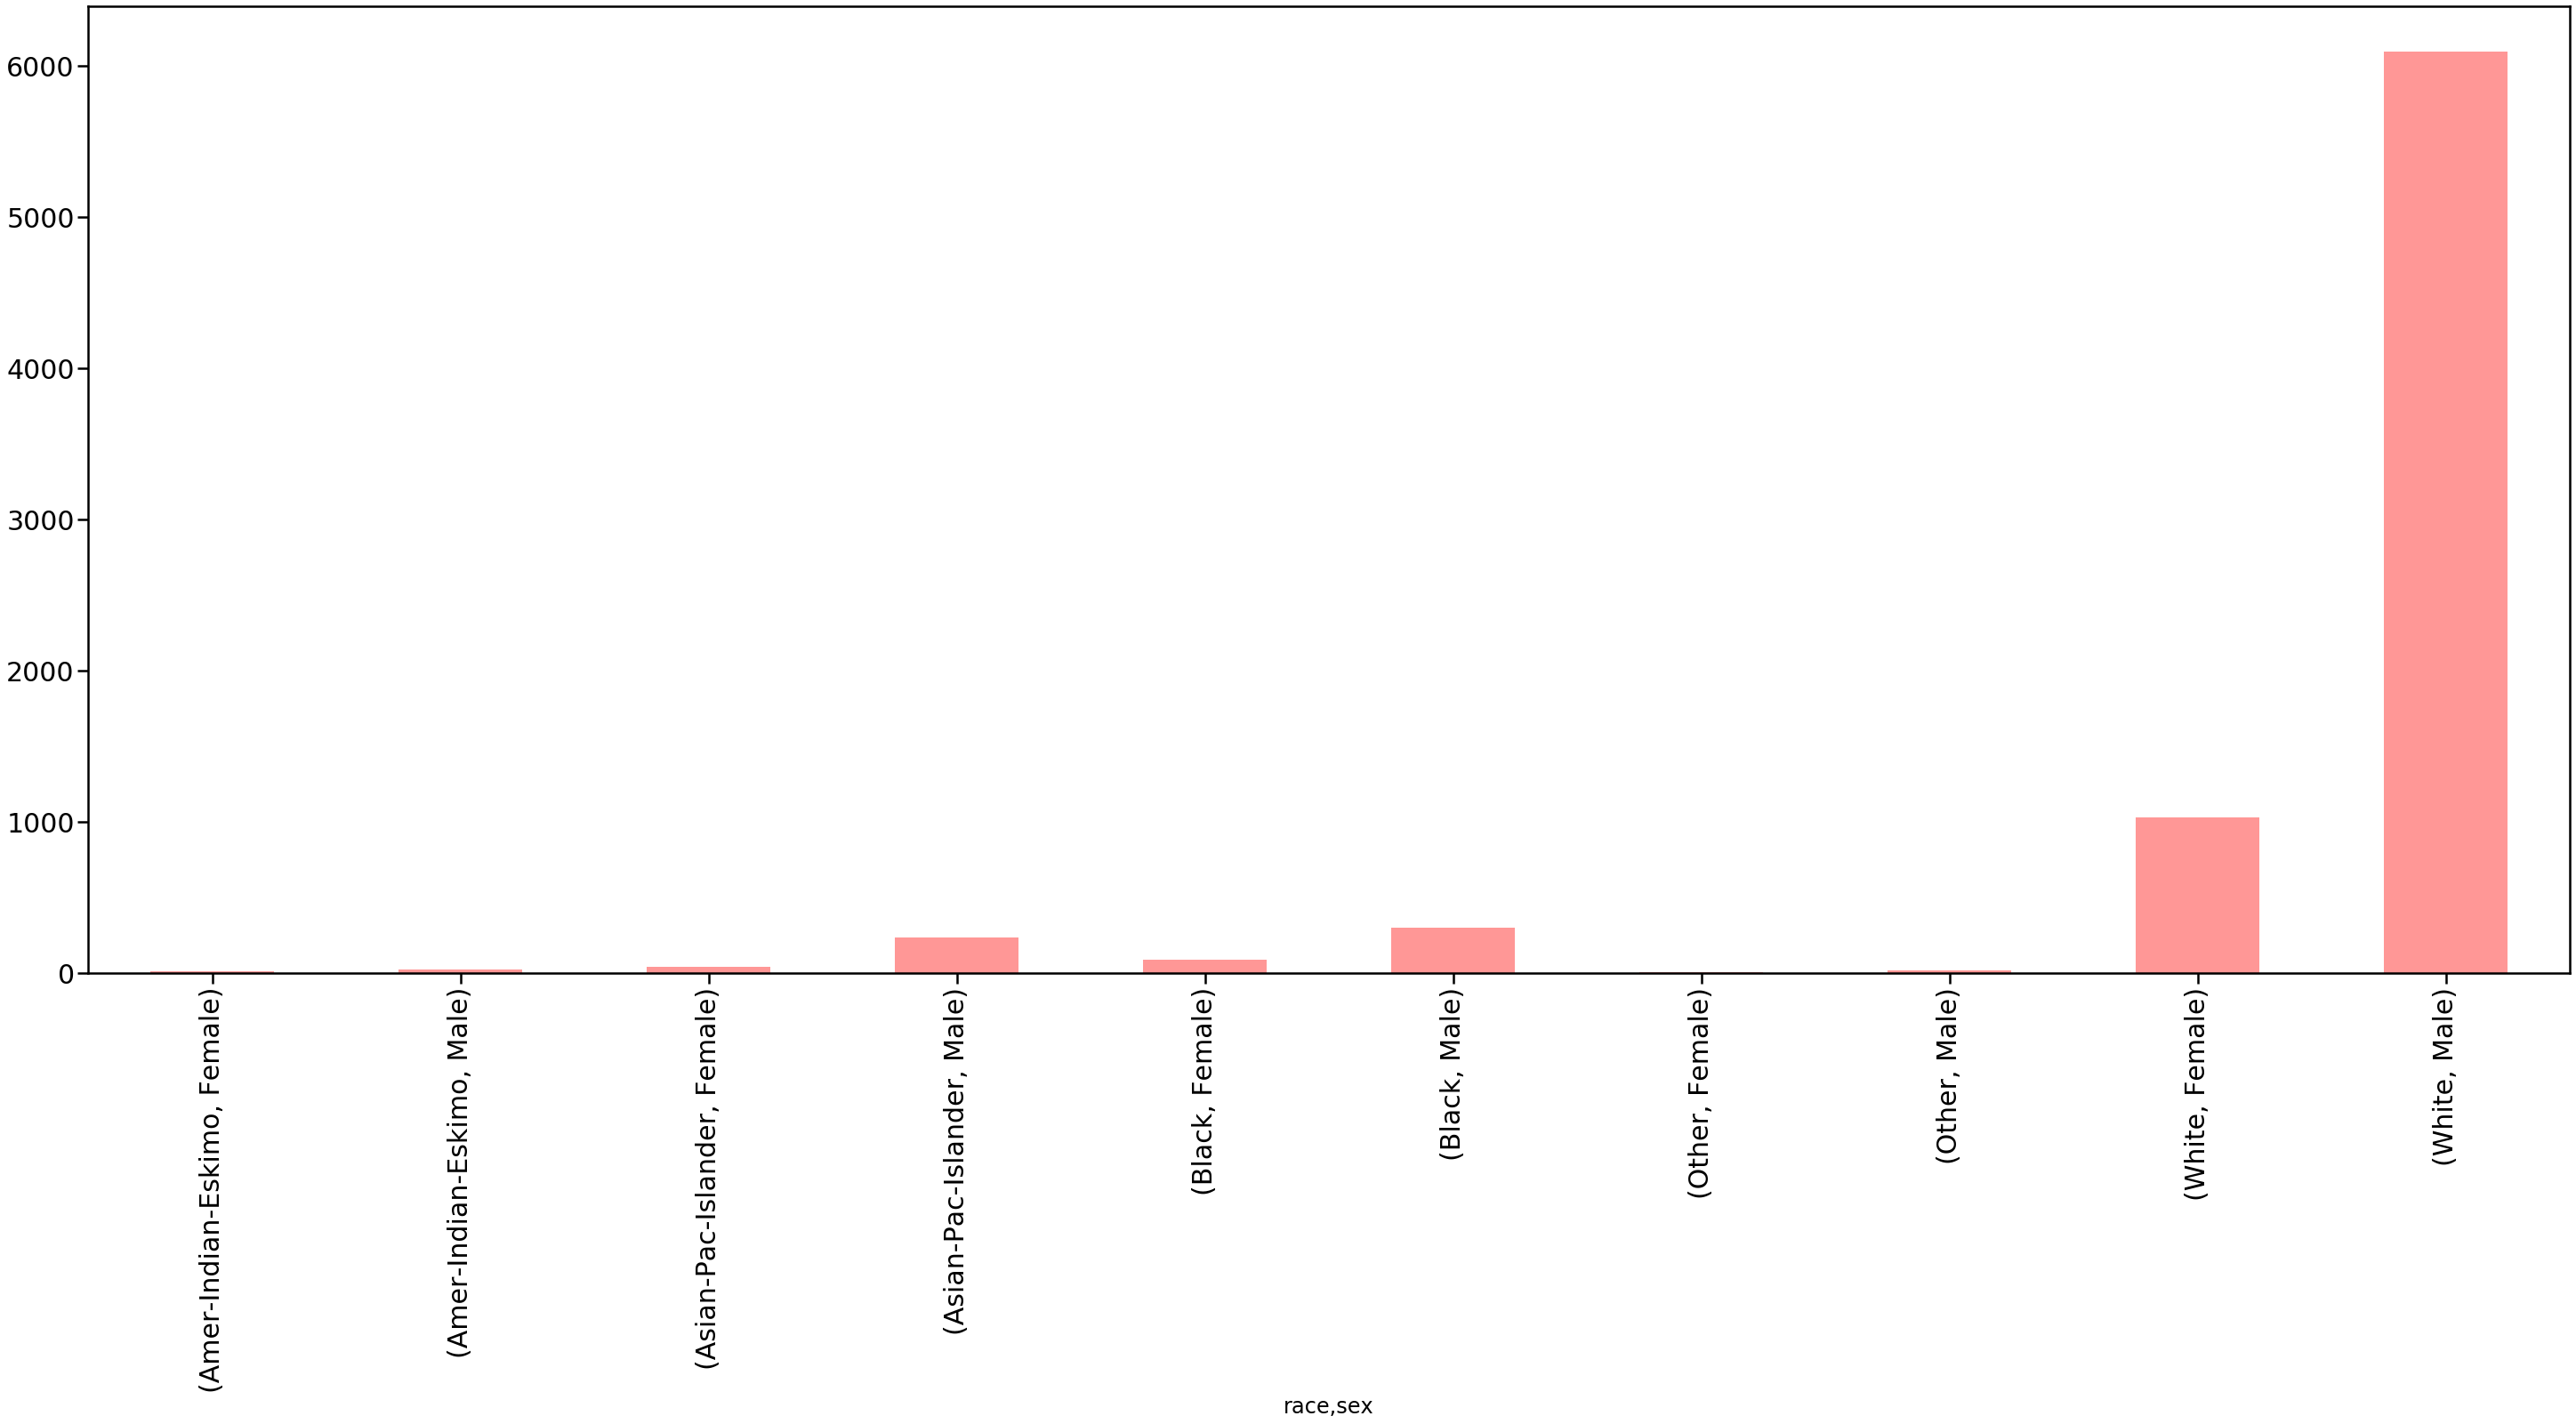

In [21]:
# Classified group of people who have above 50K income with respect to certain race and gender.

higher = data[data['income_class']==1]
higher_occup = higher.groupby(['race','sex']).size().plot(kind='bar',figsize=(50,20),fontsize=30,color='#ff9796')

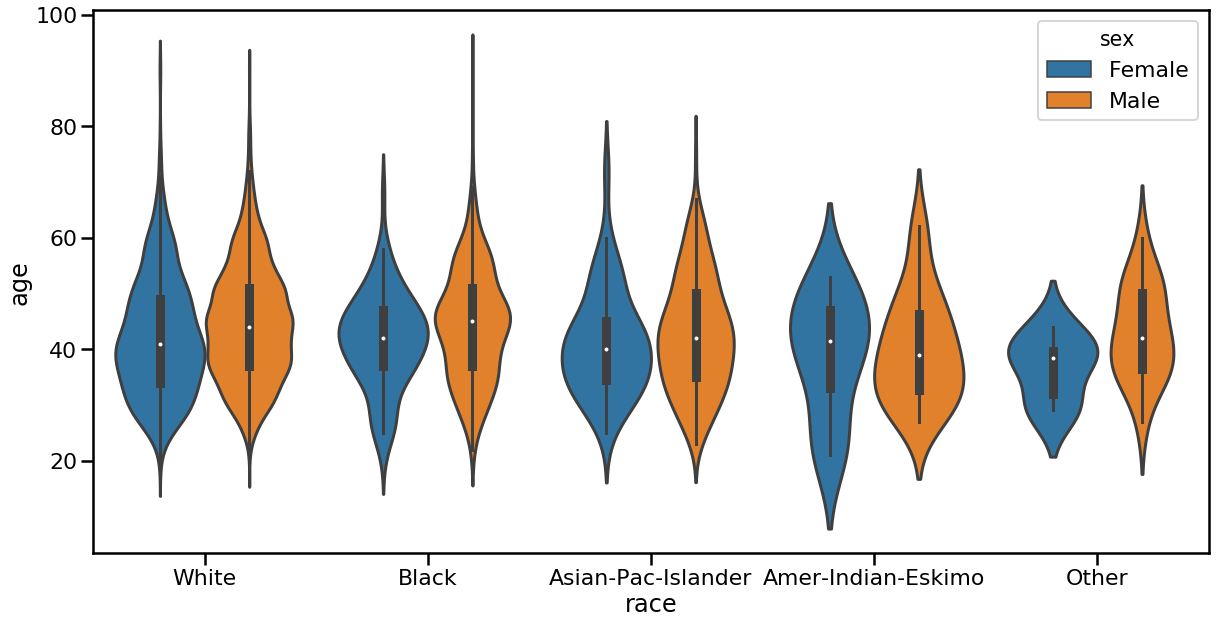

In [22]:
fig,ax = plt.subplots(figsize=(20,10))
sns.set_context('poster')
fig = sns.violinplot(x='race',y='age',data=higher,hue='sex')

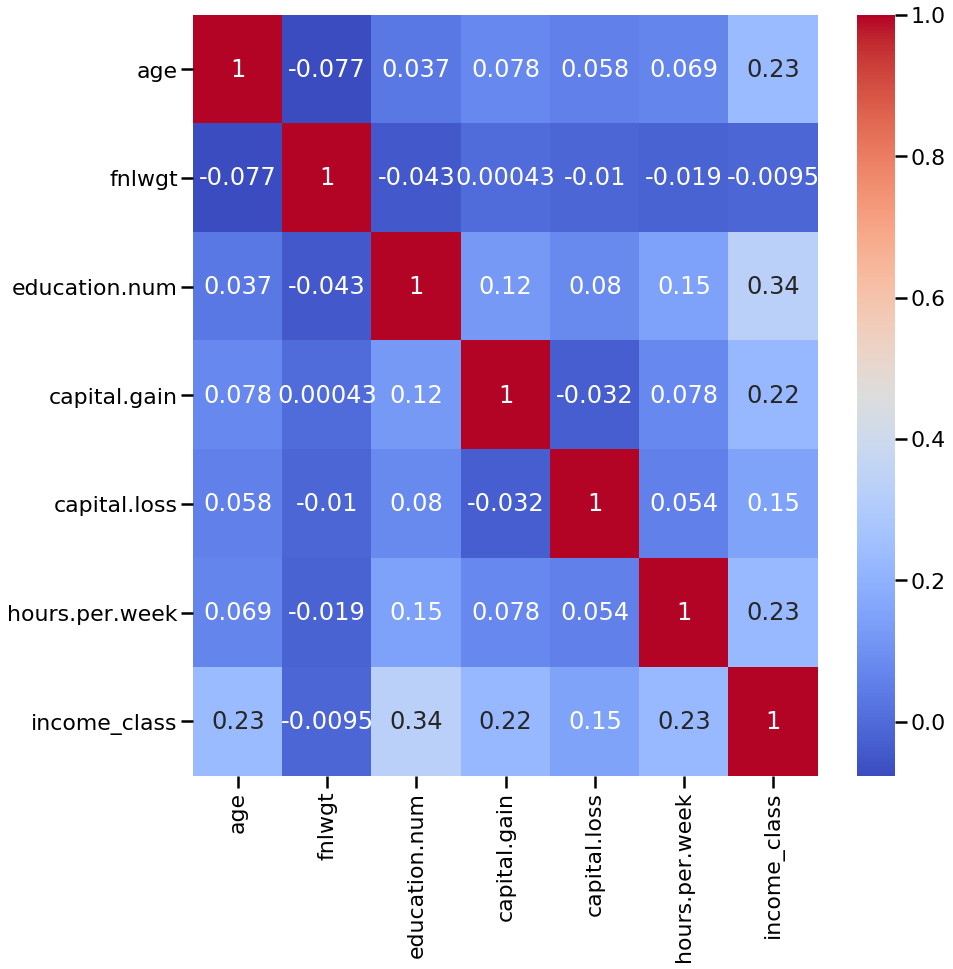

In [23]:
hl_income = data.corr()
fig,ax = plt.subplots(figsize=(14,14))
sns.set_context('poster')
fig = sns.heatmap(hl_income,annot=True,cmap='coolwarm')

In [24]:
data.pivot_table(values='income_class',index='race',columns='workclass')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
race,,,,,,,,,
Amer-Indian-Eskimo,0.080000,0.105263,0.055556,NaN,0.094737,0.500000,0.166667,0.466667,NaN
Asian-Pac-Islander,0.076923,0.454545,0.358974,NaN,0.245442,0.543478,0.328767,0.224138,0.0
Black,0.042254,0.218935,0.211806,0.0,0.103401,0.391304,0.215054,0.163522,0.0
Other,0.086957,0.000000,0.300000,NaN,0.061033,0.200000,0.555556,0.250000,NaN
White,0.114570,0.432732,0.312209,0.0,0.233560,0.563462,0.286507,0.288136,0.0


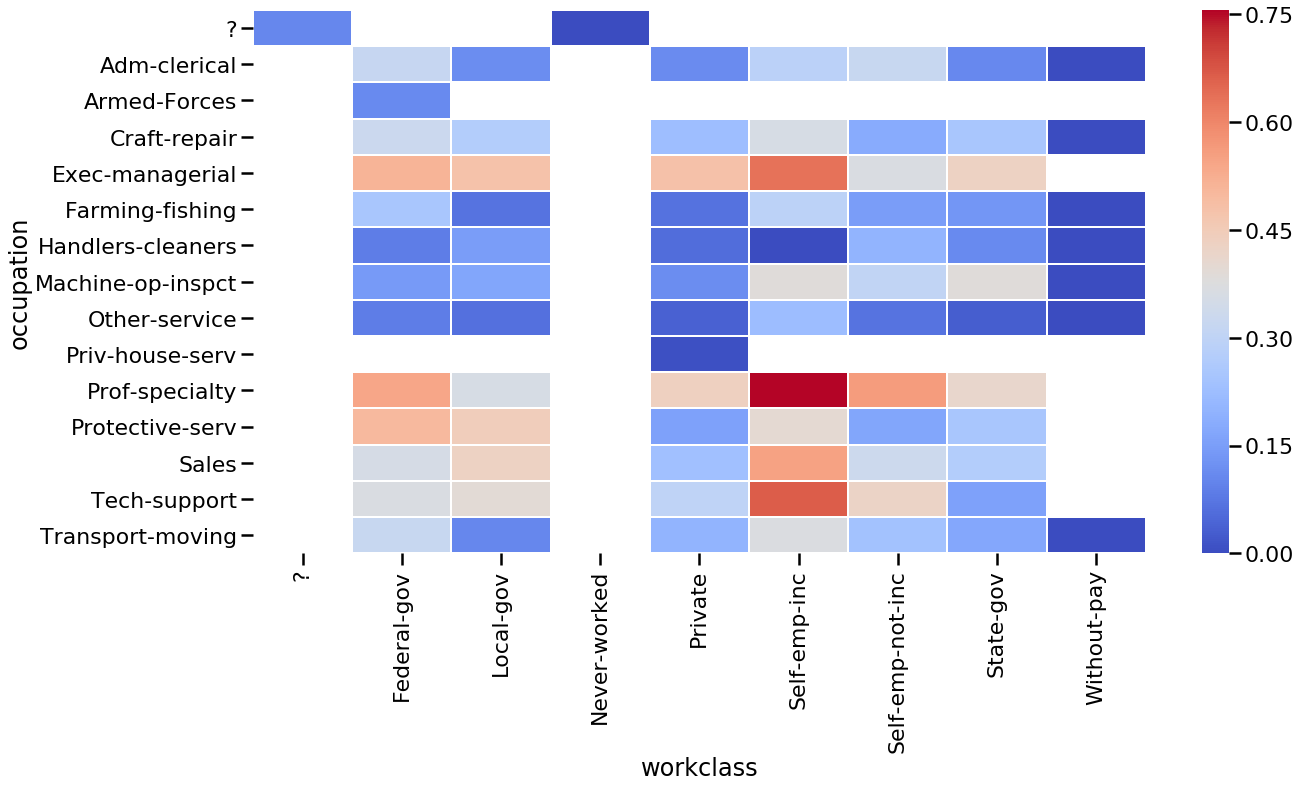

In [25]:
# Income levels with respect to both occupation and workclass.

in_occup_work = data.pivot_table(values='income_class',index='occupation',columns='workclass')
fig,ax = plt.subplots(figsize=(20,10))
sns.set_context('poster')
fig = sns.heatmap(in_occup_work,cmap='coolwarm',linecolor='white',linewidths=1)

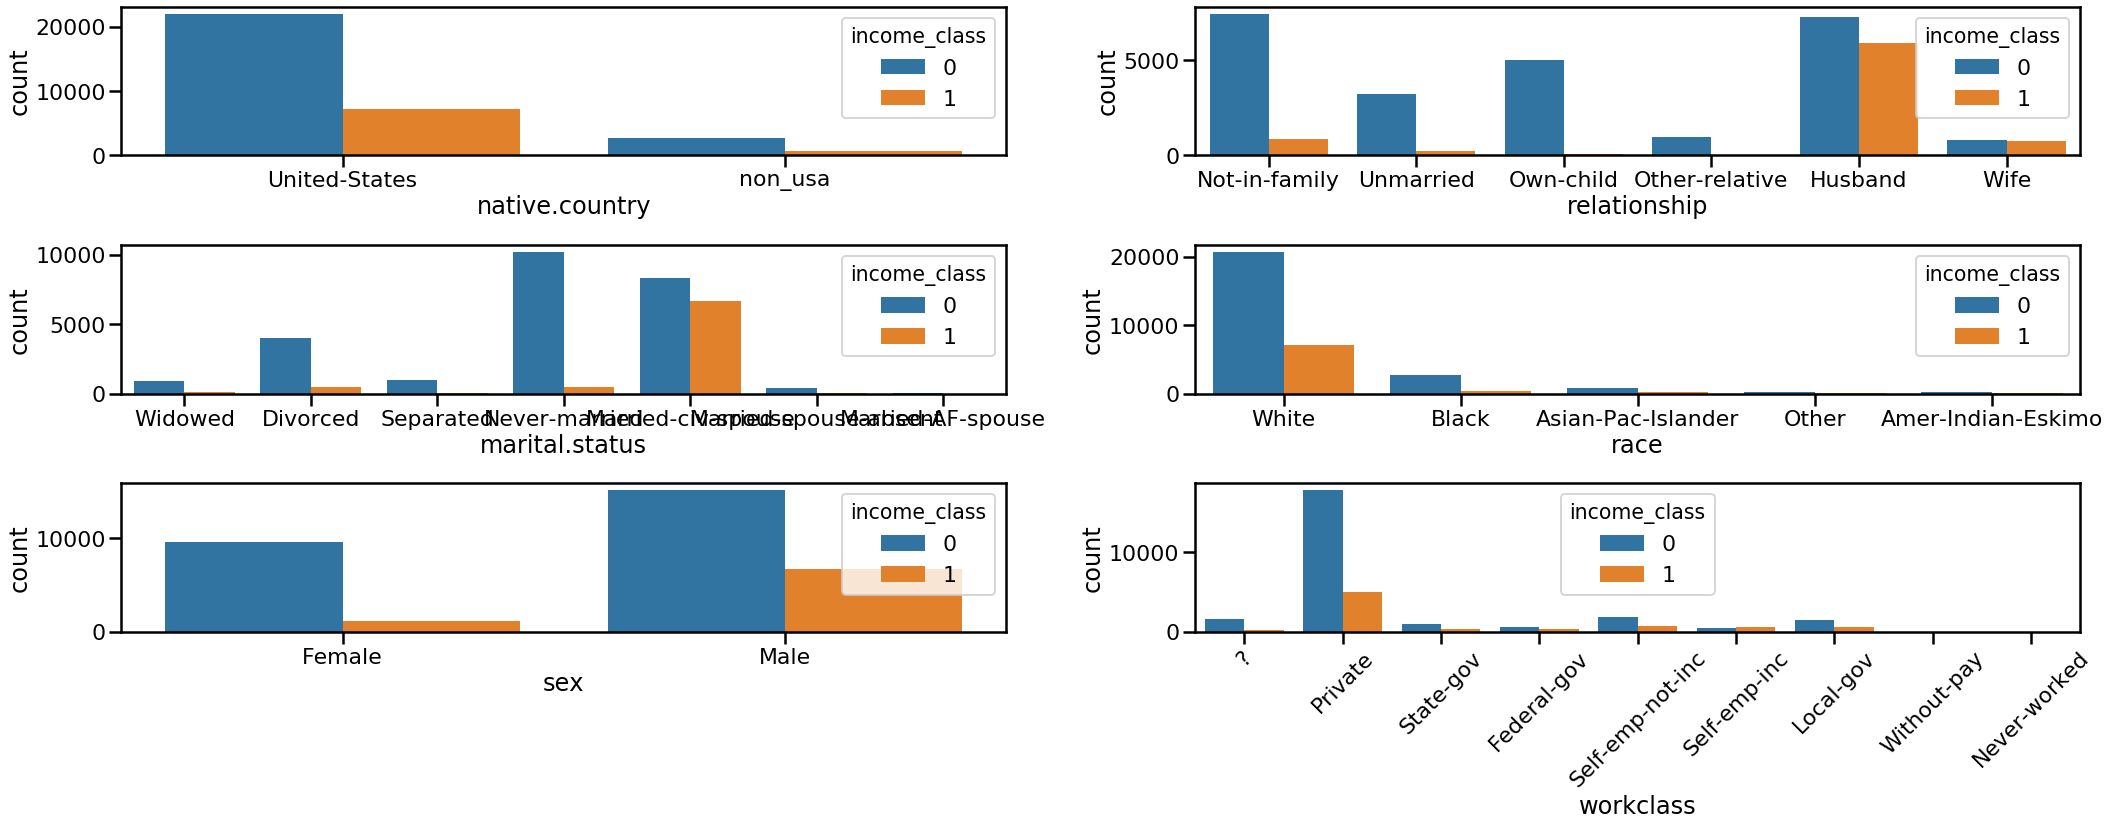

In [26]:
data.loc[data['native.country']!='United-States','native.country'] = 'non_usa'
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(30,12))
plt.xticks(rotation=45)
sns.set_context('poster')
sns.countplot(data['workclass'],hue=data['income_class'],ax=f)
sns.countplot(data['relationship'],hue=data['income_class'],ax=b)
sns.countplot(data['marital.status'],hue=data['income_class'],ax=c)
sns.countplot(data['race'],hue=data['income_class'],ax=d)
sns.countplot(data['sex'],hue=data['income_class'],ax=e)
sns.countplot(data['native.country'],hue=data['income_class'],ax=a)
plt.tight_layout()

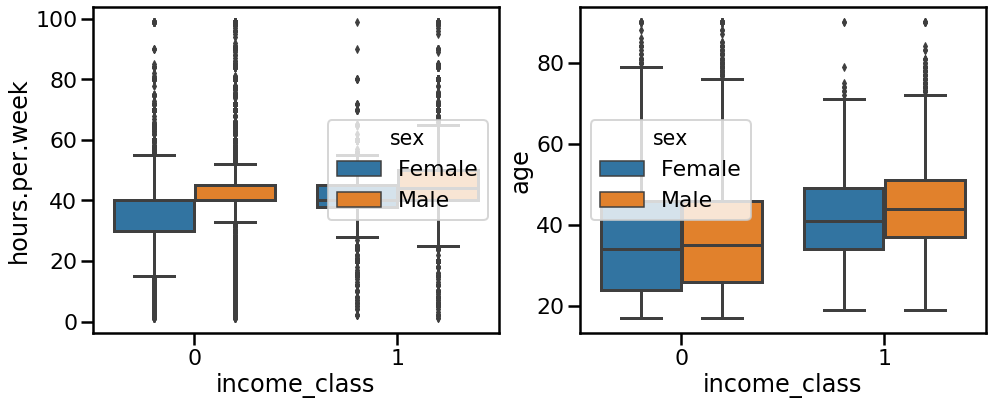

In [27]:
fig, (a,b)= plt.subplots(1,2,figsize=(16,6))
sns.boxplot(y='hours.per.week',x='income_class',hue='sex',data=data,ax=a)
sns.boxplot(y='age',x='income_class',hue='sex',data=data,ax=b)